In [1]:
import numpy as np

In [2]:
samples=['The cat sat on the mat.','The dog ate my homework.']
token_index={}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word]=len(token_index)+1
        
max_length=10

results=np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index=token_index.get(word)
        results[i,j,index]=1.
        

In [3]:
sample.split()

['The', 'dog', 'ate', 'my', 'homework.']

In [4]:
token_index["dog"]


7

In [5]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [6]:
import string
import tensorflow as tf
samples=['The cat sat on the mat.','The dog ate my homework.']
characters = string.printable
token_index=dict(zip(range(1,len(characters)+1), characters))
max_length=50
results = np.zeros((len(samples),max_length, max(token_index.keys()) +1 ))
for i, sample in enumerate(samples):
        for j, character in enumerate(sample):
            index = token_index.get(character)
            results[i,j,index] = 1

2022-11-28 10:25:55.896583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
i=enumerate(samples)
print(i)

In [9]:
results[:,:,1]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [10]:
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)

In [11]:
embedding_layer


In [12]:
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

max_features = 10000
maxlen = 20

(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words=max_features)

x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)



In [21]:
x_train.shape

(25000, 20)

In [13]:
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense, Embedding


model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history= model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


2022-11-29 11:38:10.002751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6585 - acc: 0.6357 - val_loss: 0.5735 - val_acc: 0.7140
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4802 - acc: 0.7886 - val_loss: 0.4950 - val_acc: 0.7494
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3847 - acc: 0.8381 - val_loss: 0.4918 - val_acc: 0.7566
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3242 - acc: 0.8712 - val_loss: 0.5020 - val_acc: 0.7508
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.2736 - acc: 0.9003 - val_loss: 0.5200 - val_acc: 0.7448
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.2285 - acc: 0.9233 - val_loss: 0.5471 - val_acc: 0.7422
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.1886 - acc: 0.9420 - val_loss: 0.5731 - val_acc: 0.7420
Epoch 8/10
625/625 [==============================] - 1s 1ms/step - loss: 0.

In [14]:
import os

imdb_dir='/Users/jakub.bures/Downloads/aclImdb'
train_dir=os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name=os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            file=open(os.path.join(dir_name,fname))
            texts.append(file.read())
            file.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
        

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen= 100
training_samples=200
validation_samples=10000
max_words=10000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)

word_index=tokenizer.word_index
print('Found %s unique tokens' % len(word_index) )


Found 88582 unique tokens


In [24]:
data=pad_sequences(sequences,maxlen=maxlen)

labels=np.asarray(labels)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples: training_samples + validation_samples]
y_val=labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [34]:
import os
import numpy as np
glove_dir='/Users/jakub.bures/Downloads/glove.6B'

embedding_index={}
file=open(os.path.join(glove_dir,'glove.6B.100d.txt'))
for line in file:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs
file.close()

print('Found %s word vectors.' % len(embedding_index))

Found 400000 word vectors.


In [62]:
for word, i in word_index.items():
    embedding_matrix=[]
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

IndexError: list assignment index out of range

In [41]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model=Sequential()
model.add(Embedding(max_words,100,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

ValueError: Layer embedding_3 weight shape (10000, 100) is not compatible with provided weight shape ().

In [42]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 1s 76ms/step - loss: 0.6938 - acc: 0.5000 - val_loss: 0.6935 - val_acc: 0.5047
Epoch 2/10
7/7 [==============================] - 0s 60ms/step - loss: 0.5528 - acc: 0.9950 - val_loss: 0.6950 - val_acc: 0.4991
Epoch 3/10
7/7 [==============================] - 0s 59ms/step - loss: 0.4112 - acc: 1.0000 - val_loss: 0.6992 - val_acc: 0.5047
Epoch 4/10
7/7 [==============================] - 0s 61ms/step - loss: 0.2308 - acc: 1.0000 - val_loss: 0.7085 - val_acc: 0.5008
Epoch 5/10
7/7 [==============================] - 0s 60ms/step - loss: 0.0982 - acc: 1.0000 - val_loss: 0.7183 - val_acc: 0.5020
Epoch 6/10
7/7 [==============================] - 0s 61ms/step - loss: 0.0369 - acc: 1.0000 - val_loss: 0.7294 - val_acc: 0.5046
Epoch 7/10
7/7 [==============================] - 0s 66ms/step - loss: 0.0151 - acc: 1.0000 - val_loss: 0.7399 - val_acc: 0.5045
Epoch 8/10
7/7 [==============================] - 0s 61ms/step - loss: 0.0077 - acc: 1.0000 - val

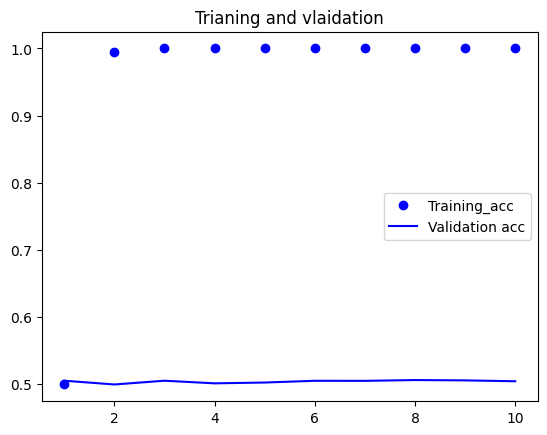

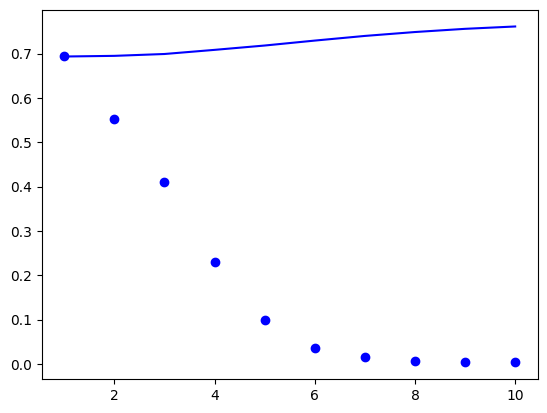

In [55]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs= range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Trianing and vlaidation')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')

In [44]:
pip install matplotlib

Looking in indexes: https://artifactory.ida.avast.com/artifactory/api/pypi/pypi-remote/simple/, https://artifactory.ida.avast.com/artifactory/api/pypi/pypi-local/simple/
  Using cached https://artifactory.ida.avast.com/artifactory/api/pypi/pypi-remote/packages/packages/f9/57/3322816ea95fa24e97232b34ff2ec92a9cd7fe7d3c6465e664bd51849760/matplotlib-3.6.2-cp39-cp39-macosx_10_12_x86_64.whl (7.3 MB)
  Using cached https://artifactory.ida.avast.com/artifactory/api/pypi/pypi-remote/packages/packages/f2/e2/7ed98290955aa83598d0e5672d88bbc193192cdcd23d3a9ed7e536cf8e55/kiwisolver-1.4.4-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
  Using cached https://artifactory.ida.avast.com/artifactory/api/pypi/pypi-remote/packages/packages/e3/d9/e9bae85e84737e76ebbcbea13607236da0c0699baed0ae4f1151b728a608/fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached https://artifactory.ida.avast.com/artifactory/api/pypi/pypi-remote/packages/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/c